In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Importing the dataset

from tensorflow.keras.datasets import mnist


In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape, y_train.shape, x_test.shape, y_train.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (60000,))

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
x_train[0].min(), x_train[0].max()

# image pixel values ranges from 0-255

(0, 255)

In [12]:
 y_train.min(), y_test.max()
    
# gives the classification of number ranges from  0-9

(0, 9)

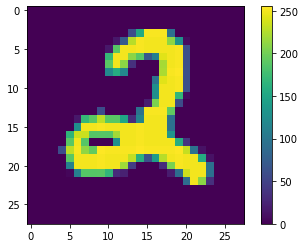

In [14]:
plt.imshow(x_train[213])
plt.colorbar();

In [15]:
# normalizing the dataset

x_train = x_train/255.0
x_test = x_test/255.0

In [16]:
x_train.min(), x_train.max()

(0.0, 1.0)

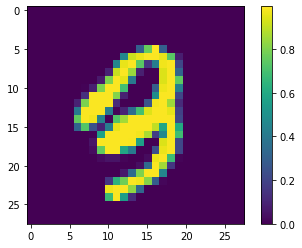

In [17]:
#  After normalization the pixel value changes from 0-255 to 0-9
plt.imshow(x_train[1244])
plt.colorbar();

In [18]:
x_train.shape

# the image is of shape 28, 28

(60000, 28, 28)

In [19]:
# Building the model

model = tf.keras.models.Sequential()


In [20]:
# first LSTM layer

model.add(tf.keras.layers.LSTM(units = 128, 
                              activation = 'relu',
                              return_sequences = True,
                              input_shape = (28,28)))

#Dropout layer

model.add(tf.keras.layers.Dropout(0.2))





In [21]:
# second LSTM layer

model.add(tf.keras.layers.LSTM(units = 128, 
                              activation = 'relu'))

# Dropout Layer

model.add(tf.keras.layers.Dropout(0.2))

In [22]:
# Adding Fully Connected layer

# first Dense layer

model.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))

# dropoutlayer

model.add(tf.keras.layers.Dropout(0.2))


# output layer

model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))



In [23]:
# summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 128)           80384     
_________________________________________________________________
dropout (Dropout)            (None, 28, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [25]:
# Compiling the model

model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001) ,
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [28]:
# Training the Model

history = model.fit(x_train, y_train, 
          epochs = 10, 
          validation_data = (x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.5605 - accuracy: 0.8196 - val_loss: 0.1491 - val_accuracy: 0.9562
Epoch 2/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.1549 - accuracy: 0.9586 - val_loss: 0.0890 - val_accuracy: 0.9740
Epoch 3/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1095 - accuracy: 0.9714 - val_loss: 0.0862 - val_accuracy: 0.9755
Epoch 4/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0790 - accuracy: 0.9789 - val_loss: 0.0622 - val_accuracy: 0.9811
Epoch 5/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0667 - accuracy: 0.9822 - val_loss: 0.0471 - val_accuracy: 0.9872
Epoch 6/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0590 - accuracy: 0.9845 - val_loss: 0.0510 - val_accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0573 - accuracy: 0.9851 - val_loss: 0.0530 -

In [36]:
# Model Prediction

y_pred = model.predict(x_test)
y_classes=np.argmax(y_pred,axis=1)

In [37]:
y_pred

array([[3.7351472e-12, 1.5957261e-07, 5.7886311e-08, ..., 9.9994898e-01,
        7.2931829e-09, 5.0198083e-05],
       [2.3784583e-20, 5.9247983e-14, 1.0000000e+00, ..., 5.1871226e-15,
        5.8462251e-16, 5.5621409e-25],
       [2.5050378e-12, 9.9999976e-01, 1.6761541e-08, ..., 1.6875815e-07,
        1.5454559e-07, 2.5687685e-10],
       ...,
       [6.5281197e-20, 4.9314331e-17, 2.1403618e-15, ..., 5.2424214e-16,
        8.5967826e-19, 1.3685834e-11],
       [2.5892472e-10, 1.6706785e-14, 3.1006492e-10, ..., 5.1387354e-14,
        1.1034923e-08, 8.6644131e-10],
       [6.8196685e-12, 1.3977543e-20, 9.7463700e-20, ..., 3.2773550e-26,
        6.0348128e-18, 2.8271051e-30]], dtype=float32)

In [39]:
y_pred = np.round(y_pred).astype(int)
y_pred

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [40]:
y_pred[56], y_test[56]

(array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]), 4)

In [41]:
y_pred[75],y_test[75]

(array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]), 7)